In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sweetviz as sv
import warnings
warnings.filterwarnings('ignore')

In [3]:
ds=pd.read_csv('C:\\Users\\Admin\\excel\\logistic_regression.csv')

In [5]:
ds.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [7]:
ds.shape

(396030, 27)

In [9]:
ds.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')


Data dictionary:

loan_amnt : The amount of loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

term : The number of payments on the loan. Values are in months and can be either 36 or 60.

int_rate : Interest Rate on the loan

installment : The monthly payment owed by the borrower if the loan originates.

grade : LoanTap assigned loan grade

sub_grade : LoanTap assigned loan subgrade

emp_title : The job title supplied by the Borrower when applying for the loan.

emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.

annual_inc : The self-reported annual income provided by the borrower during registration.

verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified

issue_d : The month which the loan was issued

loan_status : Current status of the loan = Target Variable

purpose : A category provided by the borrower for the loan request.

title : The loan title provided by the borrower

dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.

earliest_cr_line : The month the borrower's earliest reported credit line was opened

open_acc : The number of open credit lines in the borrower's credit file.

pub_rec : Number of derogatory public records

revol_bal : Total credit revolving balance

revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

total_acc : The total number of credit lines currently in the borrower's credit file

initial_list_status : The initial listing status of the loan. Possible values are – W, F

application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers

mort_acc : Number of mortgage accounts.

pub_rec_bankruptcies : Number of public record bankruptcies

Address: Address of the individual


In [12]:
ds.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [14]:
ds.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [16]:
#dividing categorical and numerical columns for EDA

In [18]:
num_cols=['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies']
cat_cols=['term', 'grade', 'sub_grade','emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d','purpose', 'title', 
          'earliest_cr_line','initial_list_status', 'application_type','address']

In [20]:
ds.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48816
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

Categorical columns Analysis

In [23]:
ds['term'].value_counts()

term
36 months    302005
60 months     94025
Name: count, dtype: int64

In [25]:
ds['loan_amnt'].value_counts()

loan_amnt
10000.0    27668
12000.0    21366
15000.0    19903
20000.0    18969
35000.0    14576
           ...  
36225.0        1
950.0          1
37800.0        1
30050.0        1
725.0          1
Name: count, Length: 1397, dtype: int64

In [27]:
ds['loan_status'].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

In [29]:
#finding duplicates fo add column
duplicates = ds[ds.duplicated(subset=['address'])]
print(duplicates)

        loan_amnt        term  int_rate  installment grade sub_grade  \
4896      16000.0   60 months     19.89       422.93     E        E3   
6422       8200.0   36 months     13.53       278.39     B        B5   
10683      2750.0   36 months     12.69        92.25     C        C2   
11604     15000.0   36 months      6.62       460.56     A        A2   
13600      7750.0   36 months     12.99       261.10     B        B4   
...           ...         ...       ...          ...   ...       ...   
395845    32400.0   60 months     19.52       849.78     E        E3   
395852     3750.0   36 months     16.99       133.68     D        D3   
395903     5000.0   36 months     14.49       172.09     C        C4   
395917     8000.0   36 months     11.99       265.68     B        B3   
395925    10000.0   36 months     13.33       338.54     C        C3   

                                      emp_title emp_length home_ownership  \
4896                        director of nursing     1 year

In [31]:
#finding duplicates value in our dataset
duplicates=ds[ds.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [loan_amnt, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, title, dti, earliest_cr_line, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, application_type, mort_acc, pub_rec_bankruptcies, address]
Index: []

[0 rows x 27 columns]


In [33]:
ds.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [35]:
ds['int_rate'].value_counts()

int_rate
10.99    12411
12.99     9632
15.61     9350
11.99     8582
8.90      8019
         ...  
14.28        1
18.72        1
18.36        1
30.84        1
24.59        1
Name: count, Length: 566, dtype: int64

In [37]:
ds['installment'].value_counts()

installment
327.34     968
332.10     791
491.01     736
336.90     686
392.81     683
          ... 
364.37       1
1015.29      1
398.04       1
544.94       1
572.44       1
Name: count, Length: 55706, dtype: int64

In [39]:
ds['grade'].value_counts()

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

In [41]:
ds['sub_grade'].value_counts()

sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64

In [43]:
ds['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [45]:
ds['emp_length'].value_counts()

emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

In [47]:
ds['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [49]:
ds['annual_inc'].value_counts()

annual_inc
60000.00    15313
50000.00    13303
65000.00    11333
70000.00    10674
40000.00    10629
            ...  
72179.00        1
50416.00        1
46820.80        1
10368.00        1
31789.88        1
Name: count, Length: 27197, dtype: int64

In [51]:
ds['verification_status'].value_counts()

verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64

In [53]:
ds['loan_status'].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

In [55]:
ds['purpose'].value_counts()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

In [57]:
ds['title'].value_counts()

title
Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: count, Length: 48816, dtype: int64

In [59]:
ds['dti'].value_counts()

dti
0.00     313
14.40    310
19.20    302
16.80    301
18.00    300
        ... 
59.18      1
48.37      1
45.71      1
42.38      1
55.53      1
Name: count, Length: 4262, dtype: int64

In [61]:
ds['pub_rec'].value_counts()

pub_rec
0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: count, dtype: int64

In [63]:
ds['revol_util'].value_counts()

revol_util
0.00      2213
53.00      752
60.00      739
61.00      734
55.00      730
          ... 
892.30       1
110.10       1
123.00       1
49.63        1
128.10       1
Name: count, Length: 1226, dtype: int64

In [65]:
ds['application_type'].value_counts()

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

In [67]:
ds['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64

Cat Columns Summary:-

-there are 14 categorical columns.

-566 types of int rate given and majority of the falls above 5%.

-7 types of grade(A-G) and 35 of subgrades and majority of borrowers are in B,C,A respctively.

-emp_lenth that is employement years have 11 values(<1-10) with 10+ years having major contributions to dataset.

-majority of borrowers have mortage and rent as their home ownership.

-27915 types of annual income.

-3 types of verification status verified,not verified,source verified.

-loan status have 2 values out of which majority is falling under fully paid.

-14 diiferent types of 'purpose' and majority is for debt consolidation and credit card.

-majority of borrowers don't have public recorded bankrupcy.

-over 99% borrowers have application type as individual followed by joint and direct pay.

-address column is not completely unique as 2330 records have been duplicated.
    
-out of cat column there are two binary columns that are initial list status and term.
    
-Loan status is the target.



Numerical Columns Analysis

In [71]:
ds[num_cols].head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0


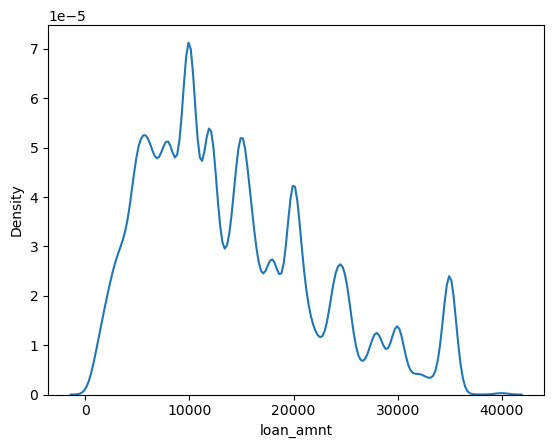

In [73]:
sns.kdeplot(data = ds[num_cols], x = 'loan_amnt')
plt.show()

-most of the loans were applied for 10000

-the range of loan_amnt lies between 0-40000 highest being 40k


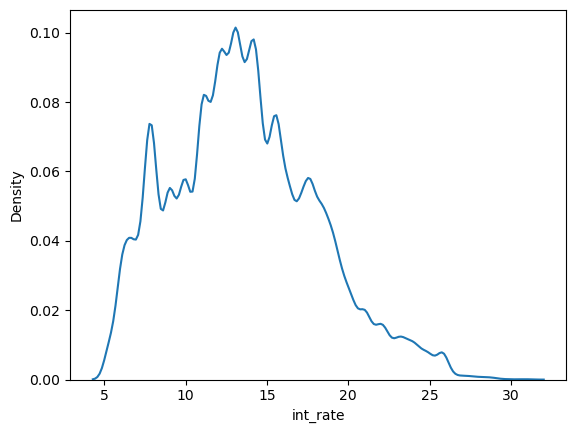

In [75]:
sns.kdeplot(data=ds[num_cols], x ='int_rate')
plt.show()

-intrest rates lies between 5-30%.

-Majority of loans were given between 12-15%.

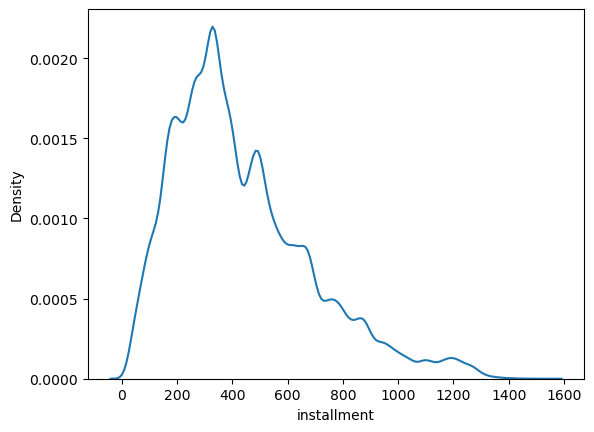

In [79]:
sns.kdeplot(data=ds[num_cols], x ='installment')
plt.show()

-Majority of installments lies between 200-400.

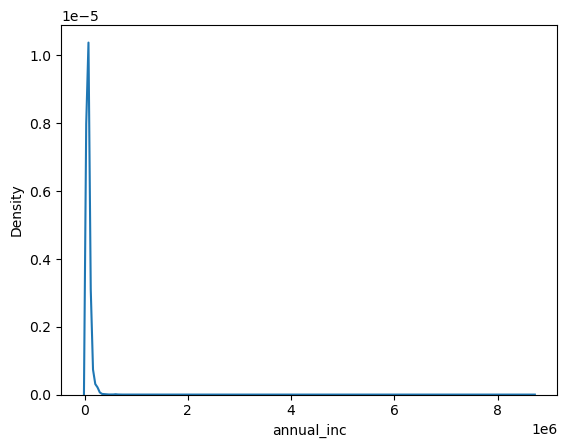

In [81]:
sns.kdeplot(data=ds[num_cols], x ='annual_inc')
plt.show()

-avg annual income lies at 72303.

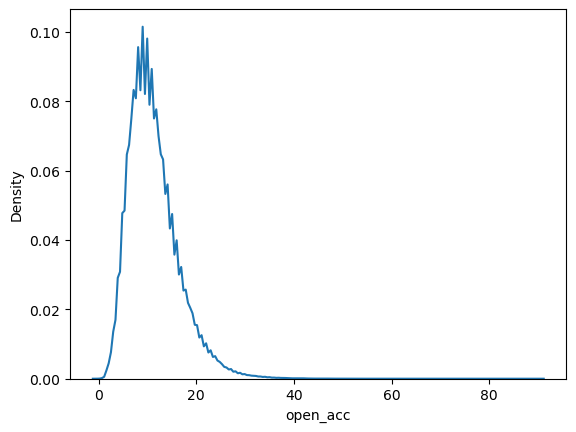

In [84]:
sns.kdeplot(data=ds[num_cols], x ='open_acc')
plt.show()

-The number of open credit lines in the borrower's credit file lies betweenthe range of 0-40 with most peaking at 10.

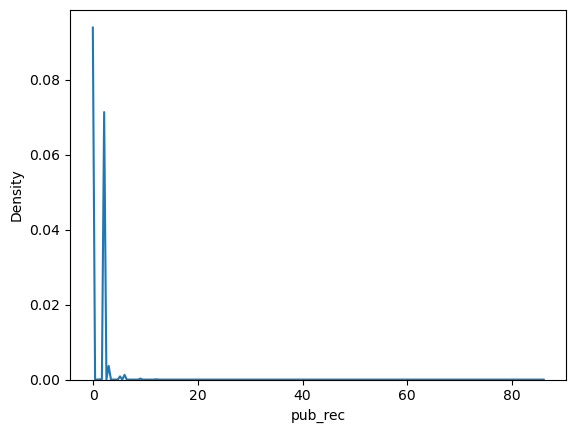

In [86]:
sns.kdeplot(data=ds[num_cols], x='pub_rec')
plt.show()

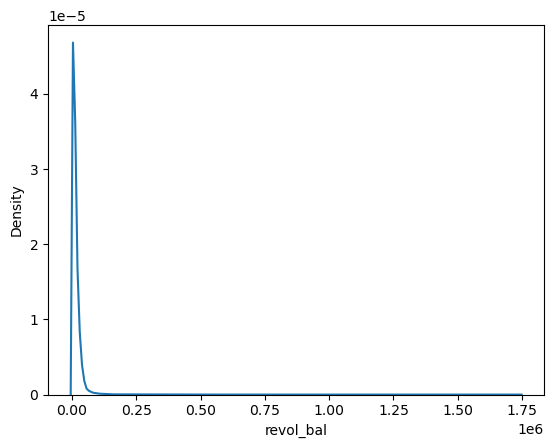

In [87]:
sns.kdeplot(data=ds[num_cols], x='revol_bal')
plt.show()

-total credit revolving balance lies between 0-10.

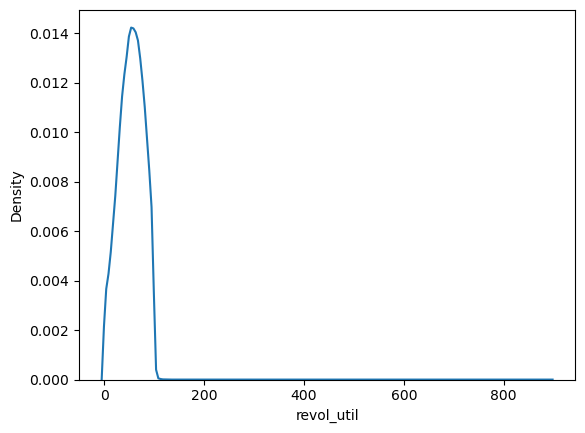

In [89]:
sns.kdeplot(data=ds[num_cols], x='revol_util')
plt.show()

-amount of credit the borrower is using relative to all available revolving credit is between 0-100.

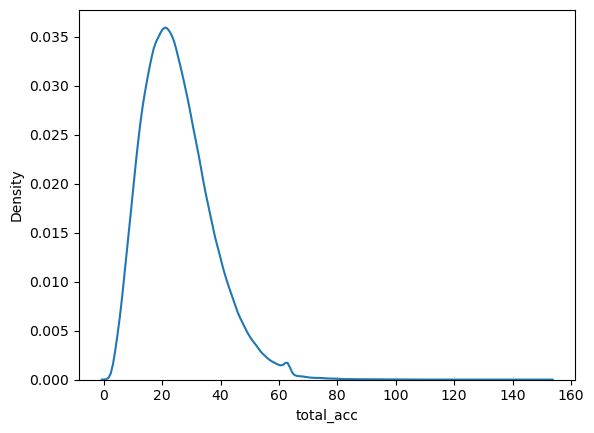

In [92]:
sns.kdeplot(data=ds[num_cols], x='total_acc')
plt.show()

-The total number of credit lines currently in the borrower's credit file lies between 0-70.

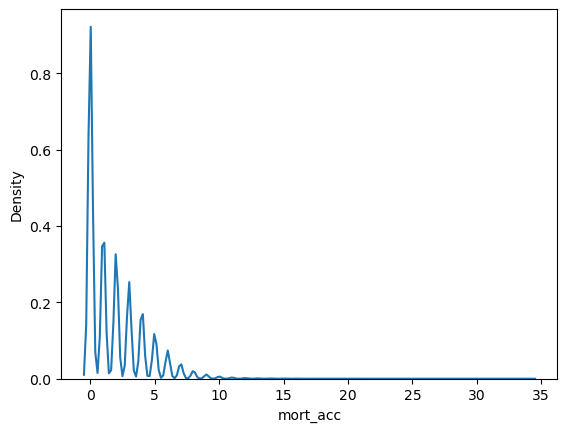

In [94]:
sns.kdeplot(data=ds[num_cols], x='mort_acc')
plt.show()

-the number of borrowers having mortgage accounts with most of them having none and rest lying between 1-12.

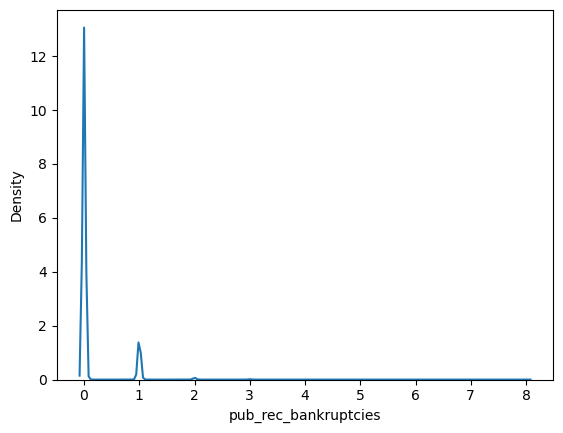

In [96]:
sns.kdeplot(data=ds[num_cols], x='pub_rec_bankruptcies')
plt.show()


-public record bankruptcies lies mostly in 0 and few in 1.

Bivariate Categorical Analysis

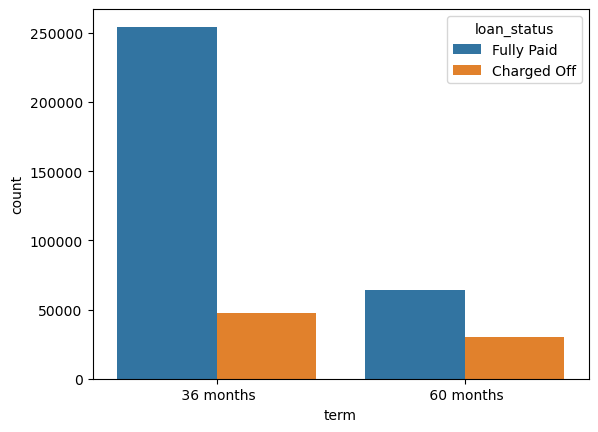

In [100]:
sns.countplot(data = ds, x = 'term', hue = 'loan_status')
plt.show()

-Most of the fully paid loans are with 36 months term while some of them in 60 months term.

-Also charged off are quiet significant in 36 as comapred to 60 months term.

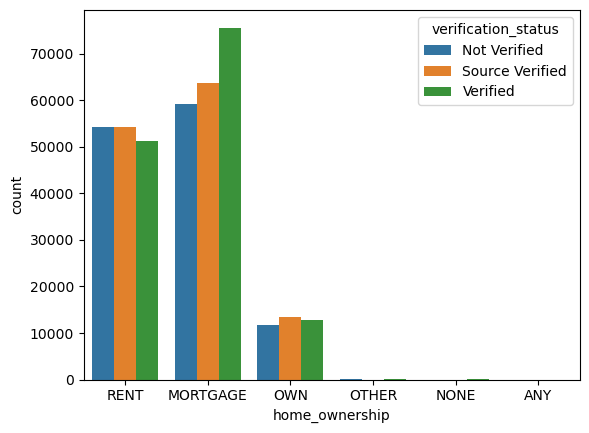

In [102]:
sns.countplot(data = ds, x ='home_ownership',hue= 'verification_status')
plt.show()

-majority of home ownership are mortage and rent, and there status are quite on verified over not verified.

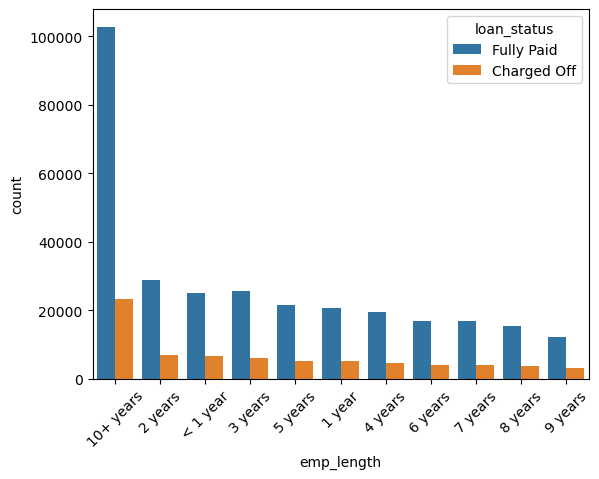

In [104]:
ax = sns.countplot(data = ds,x = 'emp_length', hue = 'loan_status', order = ds['emp_length'].value_counts().index)
plt.xticks(rotation = 45)
plt.show()

-we can further break this into 2 parts <10+ and >10

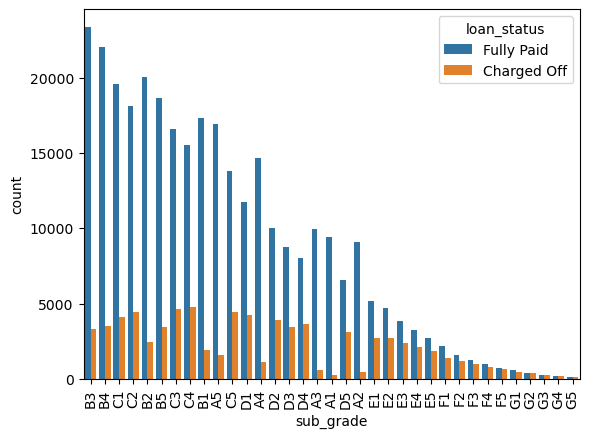

In [106]:
ax = sns.countplot(data = ds,x = 'sub_grade', hue = 'loan_status',order = ds['sub_grade'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

-B and C have highest fully paid population with B3,B4,C1,C2,B2 and B5 majoring most of it.

-B3 has the highest fully paid status while G5 has the lowest.
    
-E,F,G have lowest number of applicants.

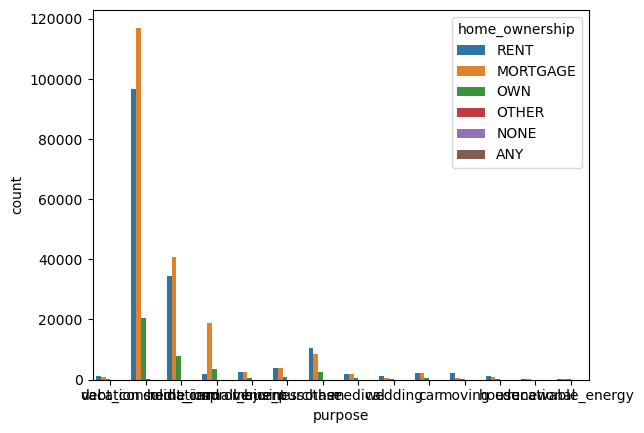

In [109]:
sns.countplot(data = ds, x ='purpose',hue= 'home_ownership')
plt.show()

Multivariative Analysis

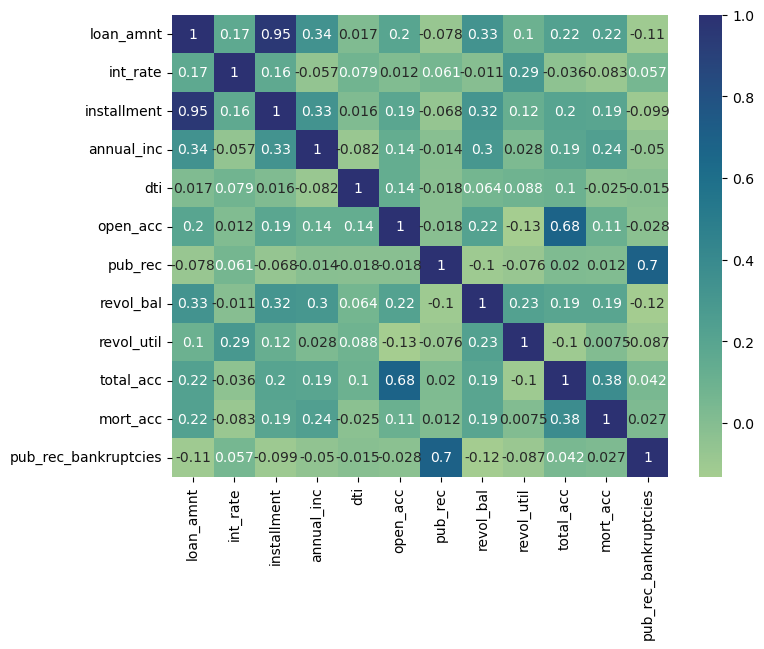

In [111]:
#building correlational heatmap
plt.figure(figsize=(8,6))
corr = ds[num_cols].corr()
sns.heatmap(data = corr, annot = True, cmap = 'crest')
plt.show()

-installment and loan_amt are correlated.

-pub_rec_bankruptcies and pub_rec are also corelatted.
    
-total_acc and open_acc are also corelated.

Data PreProcessing

-Missing Values Handling

In [127]:
ds.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [129]:
col = ['title','emp_length','emp_title']
for each in col:
    ds[each].fillna(value=ds[each].mode()[0],inplace=True)

In [131]:
ds.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                       0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [133]:
mean_col = ['revol_util','mort_acc','pub_rec_bankruptcies']
for each in mean_col:
    ds[each].fillna(value=ds[each].mean(),inplace=True)

In [135]:
ds.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

-Dropping cat cols that don't add extra information and significance

In [140]:
ds.drop(columns = ['installment','pub_rec_bankruptcies', 'open_acc','issue_d','earliest_cr_line','title','emp_title','address','sub_grade'],
        axis = 1, inplace = True)

In [142]:
ds.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc'],
      dtype='object')

-Encoding categorical columns

In [145]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
ds['emp_length']=label_encoder.fit_transform(ds['emp_length'])
ds['loan_status']=label_encoder.fit_transform(ds['loan_status'])
ds['initial_list_status']=label_encoder.fit_transform(ds['initial_list_status'])


In [149]:
ds['term']=label_encoder.fit_transform(ds['term'])

In [153]:
ds['grade']= label_encoder.fit_transform(ds['grade']) 

In [157]:
ds.loc[ds['verification_status']=='Not Verified','verification_status'] = 0
ds.loc[ds['verification_status']=='Verified','verification_status'] = 1
ds.loc[ds['verification_status']=='Source Verified','verification_status'] = 2

In [159]:
ds.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc
0,10000.0,0,11.44,1,1,RENT,117000.0,0,1,vacation,26.24,0.0,36369.0,41.8,25.0,1,INDIVIDUAL,0.0
1,8000.0,0,11.99,1,4,MORTGAGE,65000.0,0,1,debt_consolidation,22.05,0.0,20131.0,53.3,27.0,0,INDIVIDUAL,3.0
2,15600.0,0,10.49,1,10,RENT,43057.0,2,1,credit_card,12.79,0.0,11987.0,92.2,26.0,0,INDIVIDUAL,0.0
3,7200.0,0,6.49,0,6,RENT,54000.0,0,1,credit_card,2.60,0.0,5472.0,21.5,13.0,0,INDIVIDUAL,0.0
4,24375.0,1,17.27,2,9,MORTGAGE,55000.0,1,0,credit_card,33.95,0.0,24584.0,69.8,43.0,0,INDIVIDUAL,1.0


In [161]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            396030 non-null  float64
 1   term                 396030 non-null  int32  
 2   int_rate             396030 non-null  float64
 3   grade                396030 non-null  int32  
 4   emp_length           396030 non-null  int32  
 5   home_ownership       396030 non-null  object 
 6   annual_inc           396030 non-null  float64
 7   verification_status  396030 non-null  object 
 8   loan_status          396030 non-null  int32  
 9   purpose              396030 non-null  object 
 10  dti                  396030 non-null  float64
 11  pub_rec              396030 non-null  float64
 12  revol_bal            396030 non-null  float64
 13  revol_util           396030 non-null  float64
 14  total_acc            396030 non-null  float64
 15  initial_list_stat

In [171]:
ds = pd.get_dummies(ds, columns=['application_type', 'home_ownership', 'purpose'])

In [187]:
ds['application_type']=ds[['application_type_DIRECT_PAY','application_type_INDIVIDUAL','application_type_JOINT']].idxmax(axis=1).str.replace('application_type','')

In [214]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

ds['application_type_encoded'] = label_encoder.fit_transform(ds['application_type'])
ds['home_ownership_encoded'] = label_encoder.fit_transform(ds['home_ownership'])
ds['purpose_encoded'] = label_encoder.fit_transform(ds['purpose'])


ds['application_type_binary'] = (ds['application_type_encoded'] > 0).astype(int)
ds['home_ownership_binary'] = (ds['home_ownership_encoded'] > 0).astype(int)
ds['purpose_binary'] = (ds['purpose_encoded'] > 0).astype(int)

In [216]:
ds.head()

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,verification_status,loan_status,dti,pub_rec,...,mort_acc,application_type,home_ownership,purpose,application_type_encoded,home_ownership_encoded,purpose_encoded,application_type_binary,home_ownership_binary,purpose_binary
0,10000.0,0,11.44,1,1,117000.0,0,1,26.24,0.0,...,0.0,_INDIVIDUAL,RENT,vacation,1,5,12,1,1,1
1,8000.0,0,11.99,1,4,65000.0,0,1,22.05,0.0,...,3.0,_INDIVIDUAL,MORTGAGE,debt_consolidation,1,1,2,1,1,1
2,15600.0,0,10.49,1,10,43057.0,2,1,12.79,0.0,...,0.0,_INDIVIDUAL,RENT,credit_card,1,5,1,1,1,1
3,7200.0,0,6.49,0,6,54000.0,0,1,2.60,0.0,...,0.0,_INDIVIDUAL,RENT,credit_card,1,5,1,1,1,1
4,24375.0,1,17.27,2,9,55000.0,1,0,33.95,0.0,...,1.0,_INDIVIDUAL,MORTGAGE,credit_card,1,1,1,1,1,1


In [218]:

ds = ds.drop(columns=['application_type', 'home_ownership', 'purpose'])


In [220]:
ds.head()

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,verification_status,loan_status,dti,pub_rec,...,revol_util,total_acc,initial_list_status,mort_acc,application_type_encoded,home_ownership_encoded,purpose_encoded,application_type_binary,home_ownership_binary,purpose_binary
0,10000.0,0,11.44,1,1,117000.0,0,1,26.24,0.0,...,41.8,25.0,1,0.0,1,5,12,1,1,1
1,8000.0,0,11.99,1,4,65000.0,0,1,22.05,0.0,...,53.3,27.0,0,3.0,1,1,2,1,1,1
2,15600.0,0,10.49,1,10,43057.0,2,1,12.79,0.0,...,92.2,26.0,0,0.0,1,5,1,1,1,1
3,7200.0,0,6.49,0,6,54000.0,0,1,2.60,0.0,...,21.5,13.0,0,0.0,1,5,1,1,1,1
4,24375.0,1,17.27,2,9,55000.0,1,0,33.95,0.0,...,69.8,43.0,0,1.0,1,1,1,1,1,1


-Now that we have converted all categorical cols to numerical columns
-splitting the dataset

In [223]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_amnt                 396030 non-null  float64
 1   term                      396030 non-null  int32  
 2   int_rate                  396030 non-null  float64
 3   grade                     396030 non-null  int32  
 4   emp_length                396030 non-null  int32  
 5   annual_inc                396030 non-null  float64
 6   verification_status       396030 non-null  object 
 7   loan_status               396030 non-null  int32  
 8   dti                       396030 non-null  float64
 9   pub_rec                   396030 non-null  float64
 10  revol_bal                 396030 non-null  float64
 11  revol_util                396030 non-null  float64
 12  total_acc                 396030 non-null  float64
 13  initial_list_status       396030 non-null  i

In [226]:
X = ds.drop(columns = 'loan_status')
y = ds['loan_status'].astype('int')

In [228]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=True, test_size = 0.2)

In [230]:
#fitting the logistic regression model
from sklearn.linear_model import LogisticRegression  
model= LogisticRegression()  
model.fit(X_train, y_train)

LogisticRegression()

In [232]:
model.score(X_train,y_train)

0.8032787920107063

In [234]:
model.score(X_test,y_test)

0.8013786834330733

In [236]:
from sklearn.tree import DecisionTreeClassifier
dt_class=DecisionTreeClassifier(criterion='entropy',random_state=0)
dt_class.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [238]:
dt_class.score(X_train,y_train)

1.0

In [240]:
dt_class.score(X_test,y_test)

0.7074211549630078

In [242]:
#from above results we can see that this is clearly a case of overfitting 

In [244]:
# Initializing the DecisionTreeClassifier with pruning parameters
dt_class = DecisionTreeClassifier(
    criterion='entropy',     # Using 'entropy' for information gain
    random_state=0,          # Ensures reproducibility
    max_depth=5,             # Limits the tree depth
    min_samples_split=10,    # Minimum samples required to split a node
    min_samples_leaf=5,      # Minimum samples required in a leaf node
    max_leaf_nodes=15,       # Limits the number of leaf nodes
    ccp_alpha=0.01           # Post-pruning regularization parameter
)
# Fit the classifier to your training data
dt_class.fit(X_train, y_train)
# Predict on test data
y_pred = dt_class.predict(X_test)

In [246]:
dt_class.score(X_train,y_train)

0.8042351589526046

In [248]:
dt_class.score(X_test,y_test)

0.8024139585384945

In [262]:
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
precision_score(y_test, y_pred)

0.8024139585384945

In [264]:
f1_score(y_test, y_pred)

0.8903769910760566

In [266]:
accuracy_score(y_test, y_pred)

0.8024139585384945

In [268]:
recall_score(y_test, y_pred)

1.0

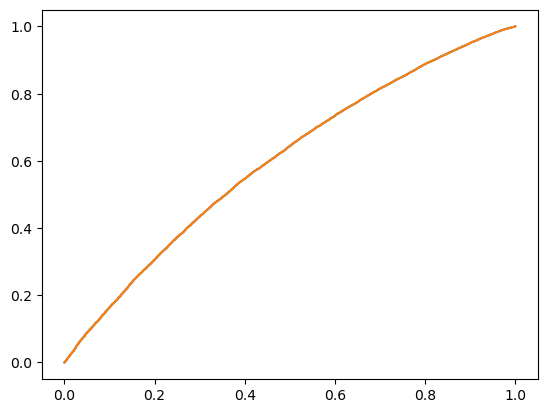

In [272]:
from sklearn.metrics import roc_curve
prob = model.predict_proba(X_test)
probabilities  = prob[:,1]
fpr,tpr,thres = roc_curve(y_test, probabilities)
plt.plot(fpr,tpr)
plt.show()

Insights:

Borrowers with more than 10 years of employment tend to fully pay loan.

Most of interest rates generally lie : 12-15%.

Loan applicants mostly had morgage account 0.

Most of the Borrowers fall in Mortage and rent as home ownership category.